In [1]:
from refnx.dataset import Data1D
from refnx.dataset import ReflectDataset
import refnx
import data_in
data = data_in.data_in('d2o/29553_54.dat')
#print(data)
# dataset = data # ...
data = Data1D(data) 
#print(data)

csv
cvs-collecting


In [2]:
from make_egg import bsla_thesis
bt = bsla_thesis()
# need all setp to varry
bt.interface_protein_solvent.setp(vary=True, bounds=(11, 40))
bt.protein_length.setp(vary=True, bounds=(25, 55))
bt.number_of_water_molecules.setp(vary=True, bounds=(1, 10000))
bt.interface_width_air_solvent.setp(vary=True, bounds=(0.1, 30))
bt.interface_width_protein_solvent.setp(vary=True, bounds=(0, 5))
bt.sld_of_protein.setp(vary=True, bounds=(1.92, 6.21))
bt.d2o_to_h2o_ratio.setp(vary=True, bounds=(0, 1))
from refnx.reflect import ReflectModel
model = ReflectModel(bt)
print(model)

ReflectModel(<make_egg.bsla_thesis object at 0x0000020BC33E2208>, name='', scale=Parameter(value=1.0, name='scale', vary=False, bounds=Interval(lb=-np.inf, ub=np.inf), constraint=None), bkg=Parameter(value=1e-07, name='bkg', vary=False, bounds=Interval(lb=-np.inf, ub=np.inf), constraint=None), dq=Parameter(value=5.0, name='dq - resolution', vary=False, bounds=Interval(lb=-np.inf, ub=np.inf), constraint=None), threads=-1, quad_order=17)


In [3]:
from refnx.analysis import Transform, CurveFitter, Objective
obj = Objective(model,data)
fitter = CurveFitter(obj)
fitter.fit('differential_evolution');

No handles with labels found to put in legend.


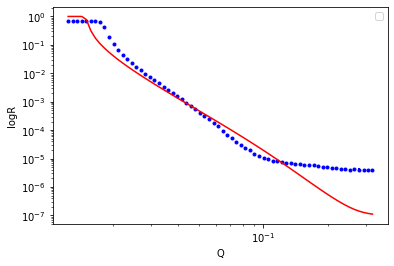

In [4]:
import matplotlib.pyplot as plt
#%matplotlib notebook
obj.plot()
plt.xlabel('Q')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('logR')
plt.legend()

In [5]:
print(bt.parameters)

________________________________________________________________________________
Parameters:     'bsla'     
<Parameter:'bsla - interface_air_protein', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'bsla - interface_protein_solvent', value=38.3268 +/- 1.63e+03, bounds=[11, 40]>
<Parameter:'bsla - protein_length', value=54.0014 +/- 1.12e+03, bounds=[25, 55]>
<Parameter:'bsla - number_of_water_molecules', value=9698.59 +/- 1.18e+06, bounds=[1, 10000]>
<Parameter:'bsla - interface_width_air_solvent', value=7.92764  +/- 320 , bounds=[0.1, 30]>
<Parameter:'bsla - interface_width_protein_solvent', value=3.01868 +/- 2.78e-11, bounds=[0, 5]>
<Parameter:'bsla - sld_of_protein', value=1.92042 +/- 3.45e+04, bounds=[1.92, 6.21]>
<Parameter:'bsla - d2o_h2o_ratio', value=0.999851 +/- 4.97e+03, bounds=[0, 1]>
